# Exploratory Data Analysis
---

**Objective:** Understand the variables, association between them and necessary transformations before model selection/building.

**Process:**
1. Importing libraries and dataset
2. Checking data types, nulls and outliers
3. Univariate analysis (target)
4. Bivariate analysis (relation to target)
5. Multivariate analysis (multicollinearity)
---

## 1. Importing libraries and dataset

In [1]:
# Adding src to the path for modules
import sys
import os
root_path = os.path.abspath('..')
src_path = os.path.join(root_path, 'src')
sys.path.append(src_path)

# Data Manipulation
import pandas as pd
import numpy as np

# Hypothesis Testing
import scipy.stats as stats

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Project variables and functions
import config 
import utils
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\vsuar\\OneDrive\\Documentos\\IncomePrediction\\src\\utils.py'>

Importing the data and having a first look at it:

In [2]:
# Importing
df = utils.read_compressed_data(config.COLLECTED_DATA_PATH)

# First look
df.sample(10)

,state,age,sex,race,literate,highest_educational_level,years_studied,worker_type,work_segment,occupation_group,tax_payer,weekly_worked_hours,main_work_income,all_work_income,weekly_worked_hours_all_jobs
143421,RS,60,1,1,1,2,6,2,5,8,2,2,2000.0,2000.0,20
691779,PE,50,1,4,1,7,16,8,7,1,1,5,2000.0,2000.0,50
216475,MT,31,2,4,1,3,9,3,11,9,1,2,1320.0,1320.0,36
630705,RJ,27,1,1,1,6,15,2,6,5,2,2,2500.0,2500.0,30
585356,PB,74,2,1,1,5,13,6,8,4,2,2,3000.0,3000.0,30
452624,MG,47,1,4,1,5,12,1,4,8,1,3,2000.0,2000.0,44
665960,GO,29,1,4,1,7,16,9,5,8,1,3,1500.0,1500.0,40
562153,PB,20,1,4,1,5,12,1,6,5,1,3,1320.0,1320.0,44
530542,PI,23,2,4,1,5,12,1,4,5,1,3,1320.0,1320.0,44
24041,RN,22,2,1,1,1,0,2,10,4,2,2,400.0,400.0,15


---
## 2. Checking data types, nulls and outliers

Checking types:

In [3]:
# Types
df.dtypes

state                            object
age                               int64
sex                               int64
race                              int64
literate                          int64
highest_educational_level         int64
years_studied                     int64
worker_type                       int64
work_segment                      int64
occupation_group                  int64
tax_payer                         int64
weekly_worked_hours               int64
main_work_income                float64
all_work_income                 float64
weekly_worked_hours_all_jobs      int64
dtype: object

Although almost all columns are codified as numeric, most of them are truly categorical.    
The ones that are numeric should be stored in a separate variable.

In [4]:
truly_numeric = ['age', 'years_studied', 'main_work_income', 'all_work_income', 'weekly_worked_hours_all_jobs']

Checking nulls:

In [5]:
# Nulls
utils.nulls_percentage(df)

Nulls Percentage by Column: 


state                            0.00%
age                              0.00%
sex                              0.00%
race                             0.00%
literate                         0.00%
highest_educational_level        0.00%
years_studied                    0.00%
worker_type                      0.00%
work_segment                     0.00%
occupation_group                 0.00%
tax_payer                        0.00%
weekly_worked_hours              0.00%
main_work_income                 0.00%
all_work_income                  0.00%
weekly_worked_hours_all_jobs     0.00%
dtype: object

Checking outliers:

In [6]:
utils.outlier_percentage(df[truly_numeric])

Percentage of Outliers per Column: 


,Inner Fence,Outer Fence
age,0.07%,0.00%
years_studied,3.08%,0.00%
main_work_income,8.49%,5.36%
all_work_income,8.79%,4.76%
weekly_worked_hours_all_jobs,16.58%,4.60%


As expected, the inner fence method is way more sensitive to outliers than the outer fence.     
Thus, outer fence can keep roughly 95% of the dataset as it is, while it separates inliers and outliers.   
This probably will be the preferred method, but I'll inspect the details before I formalize my decision.

In [7]:
utils.formatted_description(df[truly_numeric])

,age,years_studied,main_work_income,all_work_income,weekly_worked_hours_all_jobs
mean,40.9,10.8,2636.1,2713.0,39.3
std,13.6,4.3,3941.1,4138.2,12.0
min,14.0,0.0,5.0,5.0,1.0
25%,30.0,8.0,1300.0,1302.0,36.0
50%,40.0,12.0,1600.0,1600.0,40.0
75%,51.0,13.0,2900.0,3000.0,44.0
max,114.0,16.0,300000.0,300000.0,120.0


Curious outliers:
- Ages >= 100 (yet, they may happen, depending on how often)  
- People who have never studied at all (yet this not really strange to Brazilian reality)
- low income < 1300 or around 300k (people receiving way below minimum age or much more than 100x the averages)
- people who are working too little (1h/week) or too much (120h/week!!!)
    - if a person works 120h/week, he/she must work more than 5 days a week (for 120/5 = 24).
        - working 6 days, there would be 20 working hours a day
        - working 7 days, approximately 17 working hours a day
    - I can imagine few people working that much for a short period in their lives, but definitively I'll take a look at this later

For now, I'll simply conduct univariate analysis on the target variable, dealing with outliers without removing any row.

----
## 3. Univariate Analysis (Target)

Checking how often the main work income corresponds to all work income: 

In [8]:
main_is_all = df.loc[df['main_work_income']==df['all_work_income']].shape[0] / df.shape[0]
print('Porportion of rows where main income represents all income:', utils.make_percentage(main_is_all))

Porportion of rows where main income represents all income:  96.99%


Treating outliers without removing them:

In [9]:
print(f"Before Winsorization:\n Max: {df['all_work_income'].max()}\n Central Measurements:\n {utils.central_measurements(df['all_work_income'])}")
print('---'*10)
df['all_work_income'] = utils.winsorizing_outliers(df['all_work_income'])
print(f"After Winsorization:\n Max: {df['all_work_income'].max()}\n Central Measurements:\n {utils.central_measurements(df['all_work_income'])}")

Before Winsorization:
 Max: 300000.0
 Central Measurements:
 mode      1320.000000
median    1600.000000
mean      2713.003403
dtype: float64
------------------------------
After Winsorization:
 Max: 8094.0
 Central Measurements:
 mode      1320.000000
median    1600.000000
mean      2345.570765
dtype: float64


Analyzing income distribution graphically:

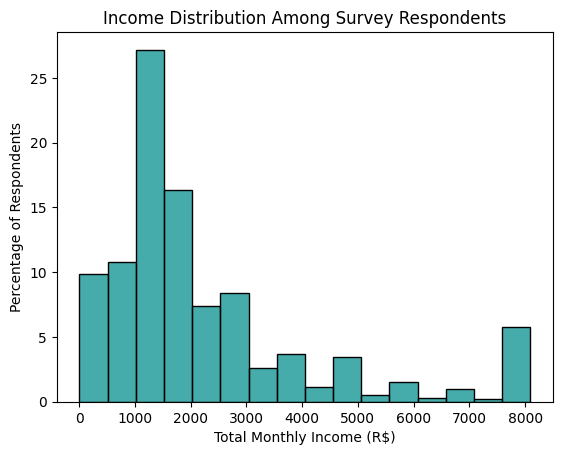

In [10]:
utils.plot_histogram(
    df['all_work_income'], 
    title= 'Income Distribution Among Survey Respondents', 
    y_label='Percentage of Respondents', 
    x_label='Total Monthly Income (R$)',
)

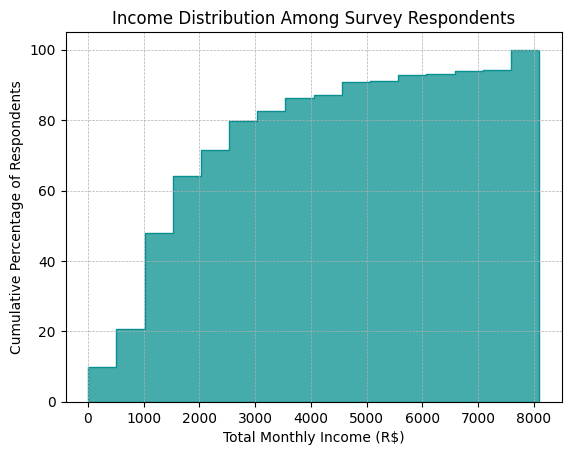

In [11]:
utils.plot_histogram(
    df['all_work_income'], 
    title= 'Income Distribution Among Survey Respondents', 
    y_label='Cumulative Percentage of Respondents', 
    x_label='Total Monthly Income (R$)',
    cumulative=True,
    element='step'
)

Checking conformity with normality:

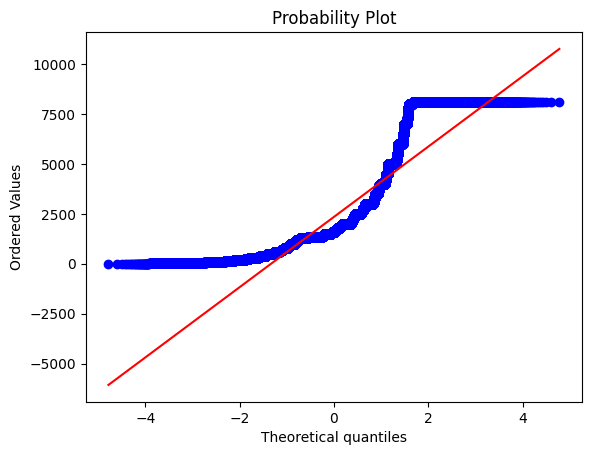

In [12]:
utils.normality_plot(df['all_work_income'])

Since income distribution is far from normality, as expected, I'll opt for non-parametric approaches for the rest of the process.   
____

## 4. Bivariate Analysis (relation to target)

The first thing will be to inspect the mutual information between each variable and the target to know where to invest time wisely:

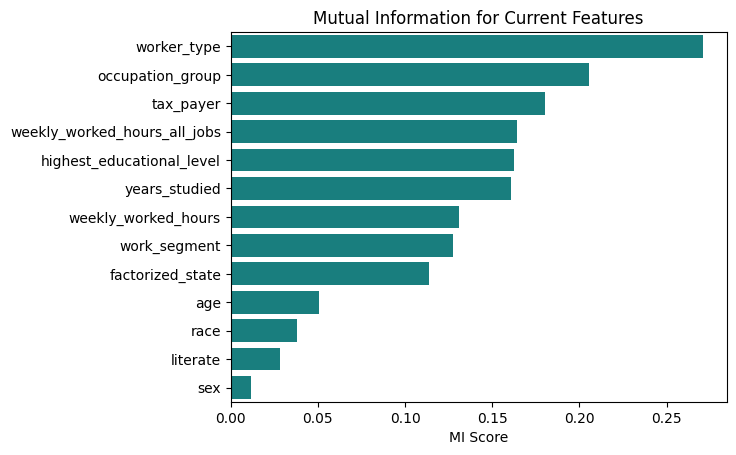

In [13]:
# Factorizing state, which is the only object type column in the dataset
df['factorized_state'], _ = pd.factorize(df['state'])

# Listing the features to test
features = [col for col in df.columns[1:] if 'income' not in col] #excludes state (first column) and all columns with 'income'

# Obtaining MI scores
mi = utils.mutual_information(
    X = df[features],
    y = df['all_work_income'],
    discrete_features = [False, True, True, True, True, False, True, True, True, True, True, False, True]
)

# Plotting MI scores
utils.show_barplot(
    cat = mi.index,
    values = mi,
    title = 'Mutual Information for Current Features',
    x_label = 'MI Score'
)


Grouping the features and ordering them by potential, we will have:
1. **Occupational**: worker_type, occupation_group, weekly_worked_hours_all_jobs, etc.
2. **Tax Compliance**: tax_payer 
3. **Educational**: highest_educational_level, years_studied
4. **Demographic**: state, age, race, sex

### 4.1 Occupational Features

In [14]:
# Initializing empty list
occupational_features = []

Since worker_type seemed the feature with highest potential, let's examine it

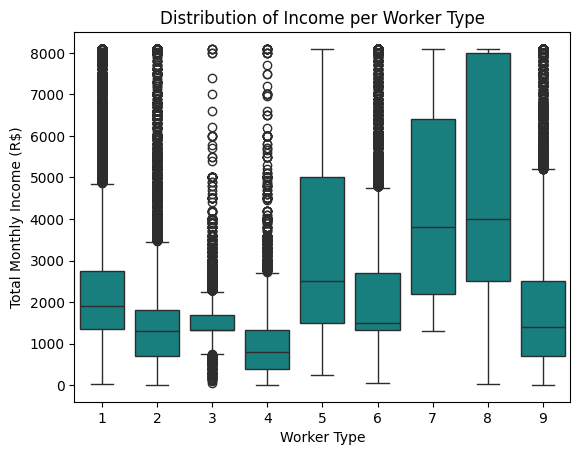

In [15]:
utils.show_boxplot(
    df=df, 
    x='worker_type', 
    y='all_work_income',
    title='Distribution of Income per Worker Type',
    x_label = 'Worker Type',
    y_label = 'Total Monthly Income (R$)')

Income is, in the most part, distributted differently between worker types, but outliers and possibly a big number of categories keep the variable from explaining more of the variability in the total income.

The definition for each worker type is:

1. Employee in the private sector with a signed employment record
2. Employee in the private sector without a signed employment record
3. Domestic worker with a signed employment record
4. Domestic worker without a signed employment record
5. Employee in the public sector with a signed employment record
6. Employee in the public sector without a signed employment record
7. Military and statuary public server
8. Employer
9. Self employed

Creating new features:

In [16]:
df['work_sector'] = df['worker_type'].apply(lambda x: 1 if x in [1, 2, 8, 9] else (2 if x in [3, 4] else 3)) # 1 - private, 2 - domestic, 3 - public
df['signed_employment_record'] = df['worker_type'].apply(lambda x: 1 if x in [1, 3, 5] else 0) # 1 - yes, 0 - no
df['worker_class'] = df['worker_type'].apply(lambda x: 1 if x in range(1,7) else (2 if x == 7 else 3)) # 1 - regular employee, 2 - military/statuary, 3 - entrepreneur

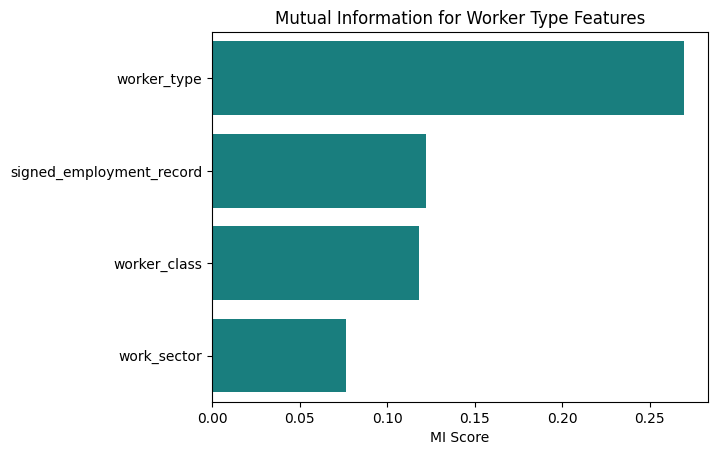

In [17]:
# Checking new MIs and boxplots:
worker_type_features = ['worker_type', 'work_sector', 'signed_employment_record', 'worker_class']

# Obtaining MI scores
mi = utils.mutual_information(
    X = df[worker_type_features],
    y = df['all_work_income'],
    discrete_features = True
)

# Plotting MI scores
utils.show_barplot(
    cat = mi.index,
    values = mi,
    title = 'Mutual Information for Worker Type Features',
    x_label = 'MI Score'
)

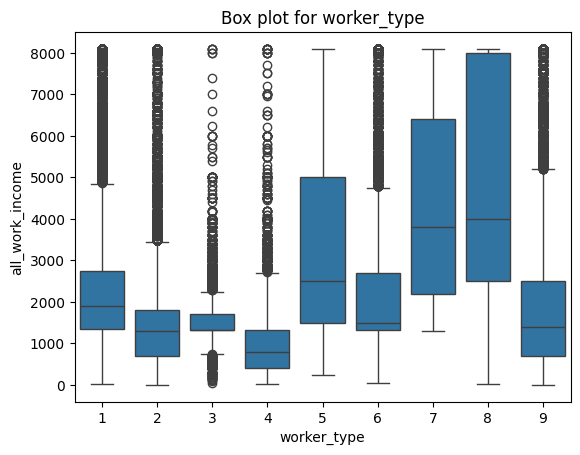

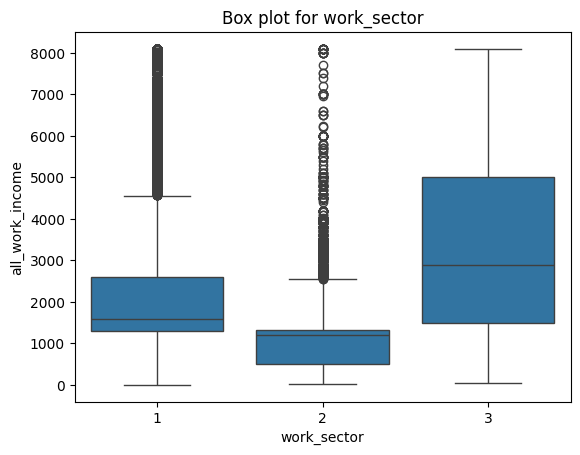

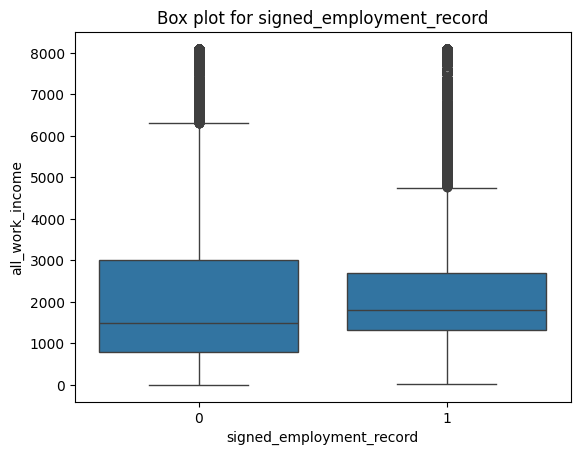

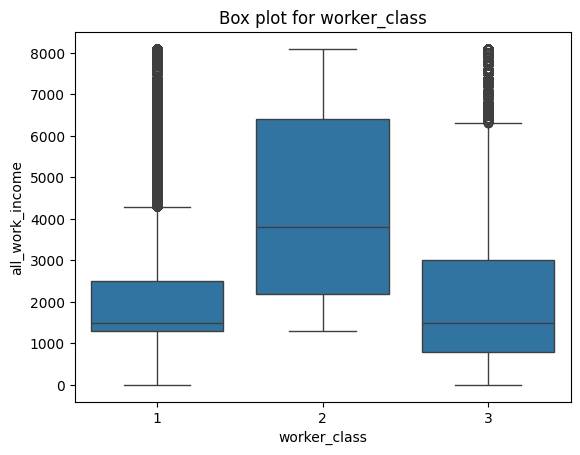

In [18]:
for col in worker_type_features:
    sns.boxplot(data=df, x=col, y='all_work_income')
    plt.title(f'Box plot for {col}')
    plt.show()